# Homework 3

## Question 1: Density Estimation

### Import Packages and Data

In [1]:
import numpy as np
import numpy.matlib
import pandas as pd
import seaborn as sns
import scipy.sparse.linalg as ll
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from scipy.stats import multivariate_normal as mvn
from sklearn.neighbors import KernelDensity
from scipy.io import loadmat
from sklearn import decomposition
from sklearn.cluster import KMeans

pol = pd.read_csv("n90pol.csv")
amy_acc = pol[['amygdala', 'acc']]
print(pol.head())
m = pol.shape[0]

   amygdala     acc  orientation
0    0.0051 -0.0286            2
1   -0.0674  0.0007            3
2   -0.0257 -0.0110            3
3    0.0504 -0.0167            2
4    0.0125 -0.0005            5


### Plot 1-D Histogram and KDE

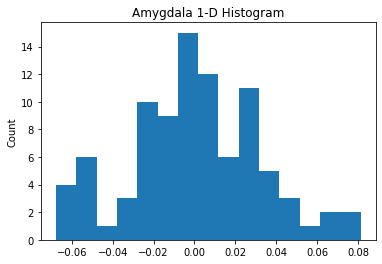

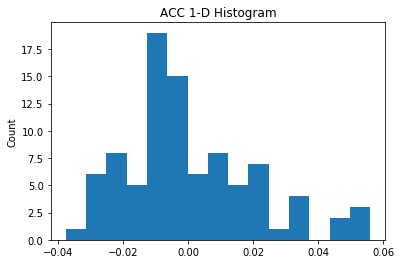

In [2]:
## Histograms
plt.hist(pol['amygdala'], bins = 15)
plt.title("Amygdala 1-D Histogram")
plt.ylabel("Count")

plt.show()
plt.hist(pol['acc'], bins = 15)
plt.title("ACC 1-D Histogram")
plt.ylabel("Count")

plt.show()

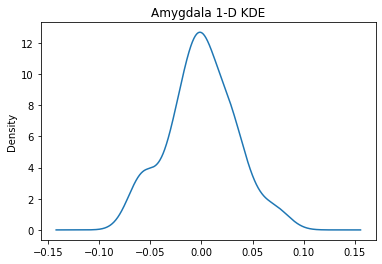

In [3]:
plt.clf()
pol['amygdala'].plot(kind = 'kde', bw_method=.4, title = "Amygdala 1-D KDE")
plt.show()

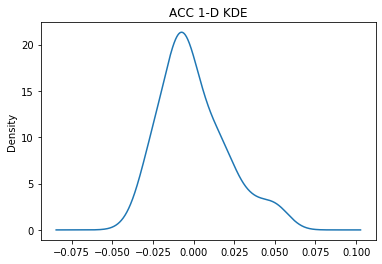

In [4]:
plt.clf()
pol['acc'].plot(kind = 'kde', bw_method=.4, title = "ACC 1-D KDE")
plt.show()

### 2-D Histogram

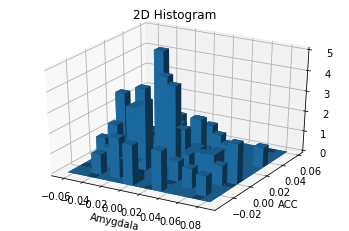

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = np.histogram2d(pol['amygdala'], pol['acc'], bins= 15)
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])
xpos = xpos.flatten()/2.
ypos = ypos.flatten()/2.
zpos = np.zeros_like (xpos)
dx = xedges [1] - xedges [0]
dy = yedges [1] - yedges [0]
dz = hist.flatten()
ax.bar3d(xpos, ypos, zpos, dx, dy, dz )
plt.title("2D Histogram")
plt.xlabel("Amygdala")
plt.ylabel("ACC")

plt.show()

### 2D KDE

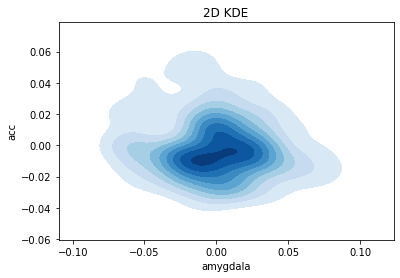

In [6]:
plt.clf()
sns.kdeplot(pol['amygdala'], pol['acc'],shade = True, shade_lowest = False, cmap = "Blues", levels = 10)
plt.title("2D KDE")
plt.show()

In [7]:
## KDE formula
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(amy_acc)
both = kde.score_samples(amy_acc)
print(both.shape)

(90,)


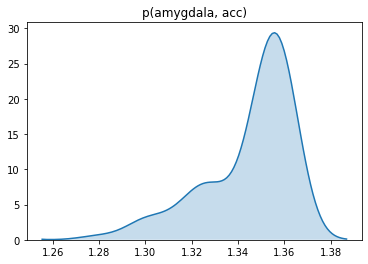

In [8]:
plt.clf()
sns.kdeplot(both,shade = True, shade_lowest = False)
plt.title("p(amygdala, acc)")
plt.show()

In [9]:
amy_kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(pol['amygdala']).reshape(-1, 1))
amy_score = amy_kde.score_samples(np.array(pol['amygdala']).reshape(-1, 1))

acc_kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(pol['acc']).reshape(-1, 1))
acc_score = acc_kde.score_samples(np.array(pol['acc']).reshape(-1, 1))

amy_x_acc = acc_score*amy_score

error = both - amy_x_acc
print(error)

[0.8951947  0.88109501 0.8954884  0.88765286 0.89793597 0.89566656
 0.89577572 0.89809241 0.89750373 0.87884443 0.88677164 0.87723357
 0.89563468 0.89752619 0.89809612 0.89502351 0.89224674 0.89698478
 0.89832241 0.88604499 0.89401671 0.89680227 0.88376949 0.89499875
 0.88512751 0.89693731 0.89656998 0.89734089 0.8863509  0.89802966
 0.88942497 0.88467769 0.8787941  0.89523336 0.89748827 0.89475295
 0.8977643  0.89641273 0.89263502 0.8864007  0.89238253 0.88754821
 0.89740306 0.89551024 0.89543965 0.89601988 0.88774007 0.89783474
 0.89413822 0.89822699 0.89827332 0.89747471 0.89403395 0.89561295
 0.89550642 0.89477582 0.89822719 0.88906242 0.89823569 0.89830037
 0.89221827 0.8976096  0.89837513 0.89591077 0.89589005 0.89323684
 0.88401212 0.89500356 0.89767317 0.89764668 0.89546376 0.89794941
 0.898334   0.89450095 0.89408457 0.89599468 0.8855758  0.88767535
 0.8902095  0.89376398 0.89655997 0.87668673 0.88834033 0.89503356
 0.87227935 0.8950531  0.89583442 0.88032114 0.89588515 0.8824

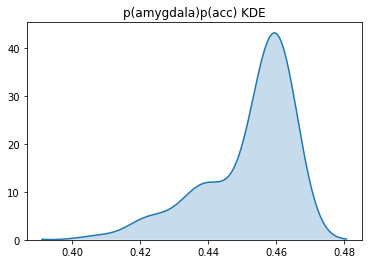

In [10]:
plt.clf()
sns.kdeplot(amy_x_acc,shade = True, shade_lowest = False)
plt.title("p(amygdala)p(acc) KDE")
plt.show()

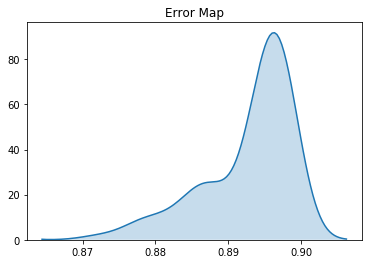

In [11]:
plt.clf()
sns.kdeplot(error,shade = True, shade_lowest = False)
plt.title("Error Map")
plt.show()

### Consider Orientation

In [12]:
## Assign c groups
c2 = pol[pol['orientation'] == 2]
c3 = pol[pol['orientation'] == 3]
c4 = pol[pol['orientation'] == 4]
c5 = pol[pol['orientation'] == 5]

amy_acc2 = c2[['amygdala', 'acc']]
amy_acc3 = c3[['amygdala', 'acc']]
amy_acc4 = c4[['amygdala', 'acc']]
amy_acc5 = c5[['amygdala', 'acc']]


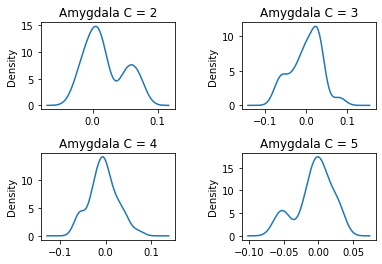

In [13]:
### Plot Amygdala KDE by c
plt.clf()
plt.subplot(2,2,1)
c2['amygdala'].plot(kind = 'kde', bw_method=.4, title = "Amygdala C = 2")

plt.subplot(2,2,2)
c3['amygdala'].plot(kind = 'kde', bw_method=.4, title = "Amygdala C = 3")

plt.subplot(2,2,3)
c4['amygdala'].plot(kind = 'kde', bw_method=.4, title = "Amygdala C = 4")

plt.subplot(2,2,4)
c5['amygdala'].plot(kind = 'kde', bw_method=.4, title = "Amygdala C = 5")

plt.subplots_adjust(hspace= .5, wspace=.5)
plt.show()

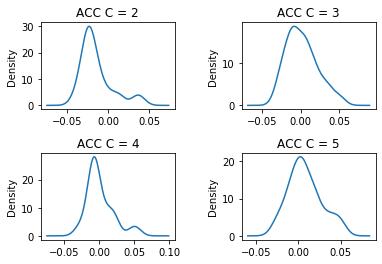

In [14]:
### Plot Amygdala KDE by c
plt.clf()
plt.subplot(2,2,1)
c2['acc'].plot(kind = 'kde', bw_method=.4, title = "ACC C = 2")

plt.subplot(2,2,2)
c3['acc'].plot(kind = 'kde', bw_method=.4, title = "ACC C = 3")

plt.subplot(2,2,3)
c4['acc'].plot(kind = 'kde', bw_method=.4, title = "ACC C = 4")

plt.subplot(2,2,4)
c5['acc'].plot(kind = 'kde', bw_method=.4, title = "ACC C = 5")

plt.subplots_adjust(hspace= .5, wspace=.5)
plt.show()

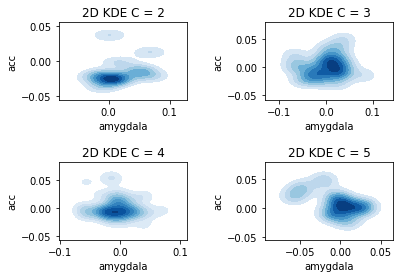

In [15]:
### Joint KDE by C
plt.clf()

plt.subplot(2,2,1)
sns.kdeplot(c2['amygdala'], c2['acc'],shade = True, shade_lowest = False, cmap = "Blues", levels = 10)
plt.title("2D KDE C = 2")

plt.subplot(2,2,2)
sns.kdeplot(c3['amygdala'], c3['acc'],shade = True, shade_lowest = False, cmap = "Blues", levels = 10)
plt.title("2D KDE C = 3")

plt.subplot(2,2,3)
sns.kdeplot(c4['amygdala'], c4['acc'],shade = True, shade_lowest = False, cmap = "Blues", levels = 10)
plt.title("2D KDE C = 4")

plt.subplot(2,2,4)
sns.kdeplot(c5['amygdala'], c5['acc'],shade = True, shade_lowest = False, cmap = "Blues", levels = 10)
plt.title("2D KDE C = 5")

plt.subplots_adjust(hspace= .8, wspace=.6)
plt.show()

In [16]:
## KDE formula
def kde_cond(amy_acc, c_plot, c):
    kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(amy_acc)
    both = kde.score_samples(amy_acc)

    plt.clf()
    plt.subplot(2,2,1)
    sns.kdeplot(both,shade = True, shade_lowest = False)
    plt.title("p(amygdala, acc) C = " + c)


    amy_kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(c_plot['amygdala']).reshape(-1, 1))
    amy_score = amy_kde.score_samples(np.array(c_plot['amygdala']).reshape(-1, 1))

    acc_kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(c_plot['acc']).reshape(-1, 1))
    acc_score = acc_kde.score_samples(np.array(c_plot['acc']).reshape(-1, 1))

    amy_x_acc = acc_score*amy_score

    error = both - amy_x_acc


##Plot 
    plt.subplot(2,2,2)
    sns.kdeplot(amy_x_acc,shade = True, shade_lowest = False)
    plt.title("p(amygdala)p(acc)  C = " + c)
    
    plt.subplot(2,2,3)
    sns.kdeplot(error,shade = True, shade_lowest = False)
    plt.title("Error Map C = " + c)
    
    plt.subplots_adjust(hspace= .5)
    plt.show()

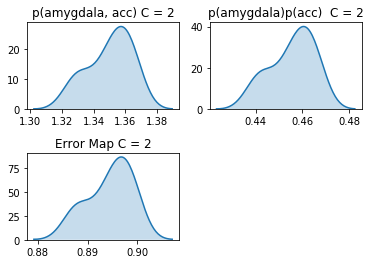

In [17]:
kde_cond(amy_acc2, c2, "2")

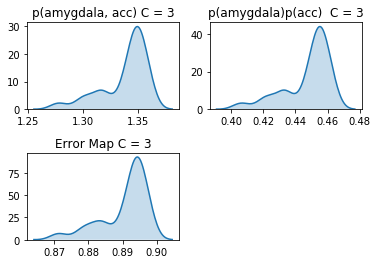

In [18]:
kde_cond(amy_acc3, c3, "3")

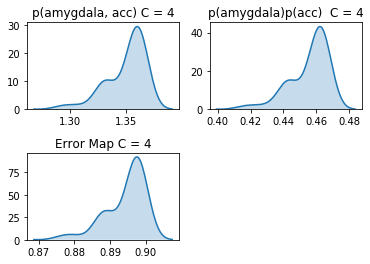

In [19]:
kde_cond(amy_acc4, c4, "4")

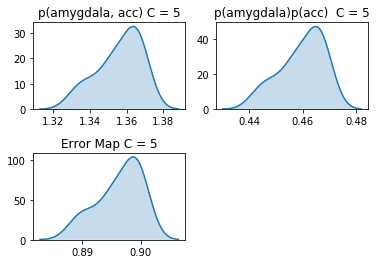

In [20]:
kde_cond(amy_acc5, c5, "5")

## Question 2: EM with PCA

### Load in Data

784
(1990, 784)
(1990, 1)
[[2]
 [2]
 [2]
 ...
 [6]
 [6]
 [6]]


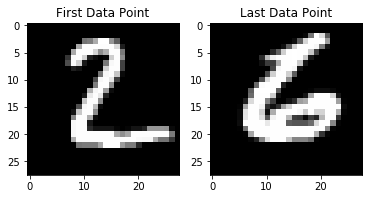

In [120]:
data = loadmat('data.mat')['data'].T
labels = loadmat('label.mat')['trueLabel'].T
## each row is an image
## image size = 28 x 28

m = data.shape[0]
n = data.shape[1]
print(n)

print(data.shape)
print(labels.shape)
#print(data[0])
print(labels)
label = []
for i in labels:
    for n in i:
        label.append(n)
C = 2

plt.clf()
plt.subplot(1, 2, 1)
plt.imshow(data[0, :].reshape(28, 28).T, cmap='gray')
plt.title("First Data Point")

plt.subplot(1, 2, 2)
plt.imshow(data[-1, :].reshape(28, 28).T, cmap='gray')
plt.title("Last Data Point")

plt.show()

### PCA

In [369]:
## First Subject
pca = decomposition.PCA(5)
pca.fit(data.T)
X = pca.transform(data.T)

print(X.shape)
X = X.T
print(X.shape)

#plt.clf()
#plt.imshow(X[0, :].reshape(28, 28).T, cmap='gray')
#plt.title("PCA First Dim")
#plt.show()


(784, 5)
(5, 784)


### Initialize variables

In [535]:
def init_var(k, n):
    pi = np.random.random(k)
    pi = pi/np.sum(pi)
    
    mu = np.random.randn(k,5)
    
    S1 = np.random.randn(k,k)
    S2 = np.random.randn(k,k)
    I = np.identity(k)
    
    sigma1 = abs((S1*S1.T) + I)
        
    sigma2 = abs((S2*S2.T) + I)
                     
    t = np.full((n, k), fill_value=0.)
    return pi, mu, sigma1, sigma2, t
pi, mu, S1, S2, tau = init_var(5, 784)
mu_old = mu.copy()

sigma = []
s = np.random.randn(5,5)
for i in s:
    sigma.append(np.full((5, k), fill_value=0.))
sigma = np.array(sigma)
print("sig:", sigma.shape)
print("Pi:", pi,"Mu:", mu,"Sig:", S1,"Tau:", tau)
print(S1[0].shape)
print(mu.shape)
print(tau.shape)

sig: (5, 5, 5)
Pi: [0.2453446  0.3189826  0.15098768 0.26482788 0.01985725] Mu: [[-0.63654866 -0.45794685 -0.10169834  0.09870033 -1.71676175]
 [-0.18092791 -0.77511083 -1.84316136  0.33330323  0.32658552]
 [-0.68937791  0.38953838 -1.25165033 -1.40420048 -0.81376889]
 [-1.62948641 -0.20395559  0.52783262  0.46131832 -0.83109846]
 [-0.44002229 -0.29024971 -1.2306867  -1.85035593 -1.23654298]] Sig: [[1.10676081e+00 2.31169713e-01 1.12397423e-01 3.32297327e-01
  1.89252071e+00]
 [2.31169713e-01 1.60071965e+00 4.17920147e-04 2.35909466e-03
  4.37811598e-01]
 [1.12397423e-01 4.17920147e-04 1.00108477e+00 1.91779005e-01
  5.22600511e-01]
 [3.32297327e-01 2.35909466e-03 1.91779005e-01 2.76241131e+00
  7.08543219e-01]
 [1.89252071e+00 4.37811598e-01 5.22600511e-01 7.08543219e-01
  1.27701059e+00]] Tau: [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
(5,)
(5, 5)
(784, 5)


In [536]:
k=5
log_l = []
for ii in range(50):
    # E-step    
    for kk in range(k):
        tau[:, kk] = pi[kk] * mvn.pdf(X.T, mu[kk], S1[kk])
    # normalize tau
    sum_tau = np.sum(tau, axis=1)
    sum_tau.shape = (784,1)    
    tau = np.divide(tau, np.tile(sum_tau, (1, k)))
     
    # M-step
    for kk in range(k):
        pi[kk] = np.sum(tau[:, kk])/m
        
        mu[kk] = X @ tau[:,kk] / np.sum(tau[:,kk], axis = 0)
        
        dummy = X.T - np.tile(mu[kk], (784,1)) # X-mu
        sigma[kk] = dummy.T @ np.diag(tau[:,kk]) @ dummy / np.sum(tau[:,kk], axis = 0)
        
    print('-----iteration---',ii)
    log_l.append(np.sum(np.log(sum_tau)))
    
    if np.linalg.norm(mu-mu_old) < 1e-3:
        print('training coverged')
        break
    mu_old = mu.copy()
    if ii==49:
        print('max iteration reached')
        break
#print(log_l)

-----iteration--- 0
-----iteration--- 1
-----iteration--- 2
-----iteration--- 3
-----iteration--- 4
-----iteration--- 5
-----iteration--- 6
-----iteration--- 7
-----iteration--- 8
-----iteration--- 9
training coverged


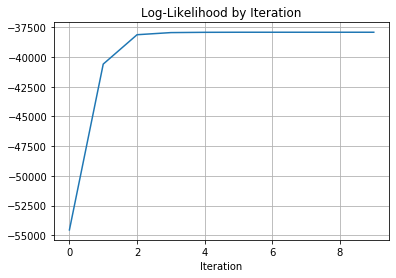

In [537]:
plt.plot(range(len(log_l)),log_l)
plt.title('Log-Likelihood by Iteration')
plt.xlabel('Iteration')
plt.grid()

plt.show()

### GMM

In [538]:
x_bar = np.mean(data, axis = 0)
print(x_bar.shape)
x_t = []
for x in data:
    x_t.append(x-x_bar)
print(data.shape)
print("m1:", x_bar.shape)
print(len(x_t[0]))
x_t = np.array(x_t)
x_t = x_t.T
print(x_t.shape)
C = x_t@x_t.T/m
e_val, e_vec = ll.eigs(C, k=k)
e_val = e_val.real
e_vec = e_vec.real
print(e_vec.shape)

lambda_mat = np.array([[(e_val[0])**(1/2), 0,0,0,0], [0, e_val[1]**(1/2),0,0,0], [0,0, e_val[2]**(1/2),0,0], [0,0,0, e_val[3]**(1/2),0], [0,0,0,0 ,e_val[4]**(1/2)]])
#print(lambda_mat)
z = np.dot(e_vec, lambda_mat)
Z = []
for i in range(784):
    Z.append(z.T@(data[i]-x_bar).T)
print(len(Z[0]))
Z = np.array(Z)
print(Z.shape)

(784,)
(1990, 784)
m1: (784,)
784
(784, 1990)
(784, 5)
5
(784, 5)


In [539]:
def init_var(k, n):
    pi = np.random.random(k)
    pi = pi/np.sum(pi)
    
    mu = np.random.randn(k,5)
    
    S1 = np.random.randn(784,k)
    S2 = np.random.randn(784,k)
    I = np.identity(784)
    
    sigma1 = abs((S1@S1.T) + I)
        
    sigma2 = abs((S2@S2.T) + I)
                     
    t = np.full((n, k), fill_value=0.)
    return pi, mu, abs(S1), abs(S2), t
pi, mu, S1, S2, tau = init_var(5, 784)
print(pi.shape)
print(mu.shape)
print(S1.shape)
print(S2.shape)
print(tau.shape)


(5,)
(5, 5)
(784, 5)
(784, 5)
(784, 5)


In [540]:
k=5
log_l = []
for ii in range(50):
    # E-step    
    for kk in range(k):
        tau[:, kk] = pi[kk] * mvn.pdf(Z, mu[kk], S1[kk])
    # normalize tau
    sum_tau = np.sum(tau, axis=1)
    sum_tau.shape = (784,1)    
    tau = np.divide(tau, np.tile(sum_tau, (1, k)))
     
    # M-step
    for kk in range(k):
        pi[kk] = np.sum(tau[:, kk])/m
        
        mu[kk] = Z.T @ tau[:,kk] / np.sum(tau[:,kk], axis = 0)
        
        dummy = Z - np.tile(mu[kk], (784,1)) # Z-mu
        sigma[kk] = dummy.T @ np.diag(tau[:,kk]) @ dummy / np.sum(tau[:,kk], axis = 0)
        
    print('-----iteration---',ii)
    log_l.append(np.sum(np.log(sum_tau)))
    
    if np.linalg.norm(mu-mu_old) < 1e-3:
        print('training coverged')
        break
    mu_old = mu.copy()
    if ii==49:
        print('max iteration reached')
        break
#print(log_l)

-----iteration--- 0
-----iteration--- 1
-----iteration--- 2
-----iteration--- 3
-----iteration--- 4
-----iteration--- 5
-----iteration--- 6
-----iteration--- 7
-----iteration--- 8
-----iteration--- 9
-----iteration--- 10
-----iteration--- 11
-----iteration--- 12
-----iteration--- 13
-----iteration--- 14
-----iteration--- 15
-----iteration--- 16
-----iteration--- 17
-----iteration--- 18
-----iteration--- 19
-----iteration--- 20
-----iteration--- 21
-----iteration--- 22
-----iteration--- 23
-----iteration--- 24
-----iteration--- 25
-----iteration--- 26
-----iteration--- 27
-----iteration--- 28
-----iteration--- 29
-----iteration--- 30
-----iteration--- 31
-----iteration--- 32
-----iteration--- 33
training coverged


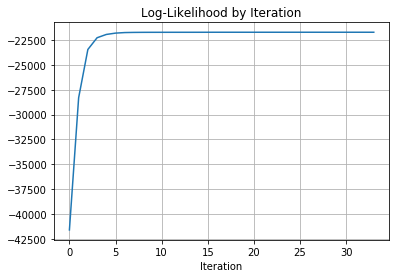

In [541]:
plt.plot(range(len(log_l)),log_l)
plt.title('Log-Likelihood by Iteration')
plt.xlabel('Iteration')
plt.grid()

plt.show()

In [542]:
rec_cov1 = e_val*lambda_mat*lambda_mat*e_val.T@S1.T
print("rec:", rec_cov1.shape)
rec_cov2 = e_val*lambda_mat*lambda_mat*e_val.T@S2.T
print("rec2:", rec_cov2.shape)

rec_mu1 = e_val*lambda_mat*mu_old + x_bar[5]
print(rec_mu1.shape)
rec_mu2 = e_val*lambda_mat*new_mu + x_bar[5]
'''
print("t", tau.shape)
new_tau = tau[:,0]
gmm_labels = []
for i in new_tau:
    if i >= 0.1:
        gmm_labels.append(0)
    elif i <0.1:
        gmm_labels.append(1)

six = 0
two = 0
for i in labels:
    if i == 6:
        six += 1
    elif i == 2:
        two += 1
print("Actual in each cluster:")
print(two, six)

model_six = 0
model_two = 0

for i in gmm_labels:
    if i == 0:
        model_two += 1
    elif i == 1:
        model_six += 1
print("GMM in each cluster:")
print(model_two,model_six)

print("GMM Mismatch Rate for 2:")
print((two-model_two)/two)

print("GMM Mismatch Rate for 6:")
print((six-model_six)/six)
'''

rec: (5, 784)
rec2: (5, 784)
(5, 5)


'\nprint("t", tau.shape)\nnew_tau = tau[:,0]\ngmm_labels = []\nfor i in new_tau:\n    if i >= 0.1:\n        gmm_labels.append(0)\n    elif i <0.1:\n        gmm_labels.append(1)\n\nsix = 0\ntwo = 0\nfor i in labels:\n    if i == 6:\n        six += 1\n    elif i == 2:\n        two += 1\nprint("Actual in each cluster:")\nprint(two, six)\n\nmodel_six = 0\nmodel_two = 0\n\nfor i in gmm_labels:\n    if i == 0:\n        model_two += 1\n    elif i == 1:\n        model_six += 1\nprint("GMM in each cluster:")\nprint(model_two,model_six)\n\nprint("GMM Mismatch Rate for 2:")\nprint((two-model_two)/two)\n\nprint("GMM Mismatch Rate for 6:")\nprint((six-model_six)/six)\n'

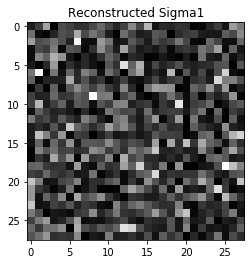

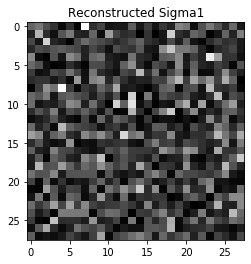

In [543]:
plt.clf()
plt.imshow(rec_cov1[0,:].reshape(28, 28).T, cmap='gray')
plt.title("Reconstructed Sigma1")
plt.show()

plt.imshow(rec_cov2[0,:].reshape(28, 28).T, cmap='gray')
plt.title("Reconstructed Sigma1")
plt.show()

### K-Means

In [478]:
## Fit Model
model = KMeans(2,random_state = 100 )
model.fit(data)
model_labels = model.labels_
print("Model Labels:")
print(model_labels)

## Count in each cluster:
label_lst = []
for i in range(2):
    label_lst.append(np.count_nonzero(model_labels == i))
print("KMeans Count in each cluster:")
print(label_lst)

six = 0
two = 0
for i in labels:
    if i == 6:
        six += 1
    elif i == 2:
        two += 1
print("Actual in each cluster:")
print(two, six)

model_six = 0
model_two = 0

for i in model_labels:
    if i == 0:
        model_two += 1
    elif i == 1:
        model_six += 1
correct_two = 0
correct_six =0
wrong_two = 0
wrong_six = 0
for i in range(len(model_labels)):
    if model_labels[i] == 0 and model_labels[i] == labels[i]:
        correct_two +=1
    elif model_labels[i] == 1 and model_labels[i] == labels[i]:
        correct_six +=1
    elif model_labels[i] == 0 and model_labels[i] != labels[i]:
        wrong_two +=1
    elif model_labels[i] == 1 and model_labels[i] != labels[i]:
        wrong_six +=1
print("KMeans Mismatch Rate for 2:")
print((two-label_lst[0])/two)

print("KMeans Mismatch Rate for 6:")
print((six-label_lst[1])/six)

Model Labels:
[0 0 0 ... 0 1 1]
KMeans Count in each cluster:
[1045, 945]
Actual in each cluster:
1032 958
KMeans Mismatch Rate for 2:
-0.012596899224806201
KMeans Mismatch Rate for 6:
0.013569937369519834
